#Linear Regression with sklearn API
1. Dataset: California Housing
2. Linear Regression API: LinearRegression
3. Training: fit (normal equation) and cross_validate (normal equation with cross validation)
4. Evaluation: score (r2score) and cross_val_score with different scoring parameters.
Model Diagnosis: LearnigCurve

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(306)
plt.style.use('seaborn')

We will use ShuffleSplit cross validation with
* 10 folds (n_splits) and 
* set aside 20% examples as test examples (test_size)

In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0)

#Step1: Load the dataset

In [ ]:
features, labels = fetch_california_housing(return_X_y=True, as_frame=True)
print('shape of feature matrix: ', features.shape)
print('shape of label vector: ', labels.shape)
assert (features.shape[0] == labels.shape[0])

shape of feature matrix:  (20640, 8)
shape of label vector:  (20640,)


#Step2: Data Exploration

#Preprocessing and model Building
##3.1 Train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)
print('# of training samples: ', train_features.shape[0])
print('# of test samples: ', test_features.shape[0])

# of training samples:  15480
# of test samples:  5160


In [ ]:
assert (train_features.shape[0] == train_labels.shape[0])
assert (test_features.shape[0] == test_labels.shape[0])

##3.2 Pipeline: Preprocessing + model
* StandarsScaler as step1
* LinearRegression as step2

In [ ]:
lin_reg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                             ('lin_reg', LinearRegression())
                             ])
lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
print('Intercept w_0: ', lin_reg_pipeline[-1].intercept_)
print('Weight coefficients(w1, w2...wm): ', lin_reg_pipeline[-1].coef_)

Intercept w_0:  2.0703489205426377
Weight coefficients(w1, w2...wm):  [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


We accessed LinearRegression object as lin_reg_pipeline[-1], which is the last step in the pipeline.

#Step4: Model Evaluation
##Score:
Score method is used to obtain train and test errors with twin objectives:
1. Estimation of model performance as provided bt test error
2. Comparioson of errors for model diagnostic purpose (under / over / just right fit)   
Score method returns r2 score whose best value is 1.

In [ ]:
test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set: ', test_score)

training_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model performance on test set: ', training_score)

Model performance on test set:  0.5910509795491352
Model performance on test set:  0.609873031052925


The r2 score on training and test set are comparable, but they are not that high. It poits to underfitting issue in model training.

##Cross valodated score (cross_val_score):
Calculates performance of different test folds through cross validation

In [ ]:
lin_reg_score = cross_val_score(lin_reg_pipeline,
                                train_features,
                                train_labels,
                                scoring='neg_mean_squared_error',
                                cv=shuffle_split_cv)
print(lin_reg_score)

print(f'\nScore of linear regression model on test set: {lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}')

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear regression model on test set: -0.529 +/- 0.022


We can convert negative mean squared error as follows

In [ ]:
lin_reg_mse = -1 * lin_reg_score

print(f'Score of linear regression model on test set: {lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}')

Score of linear regression model on test set: 0.529 +/- 0.022


The other options for scoring parameter are:
* explained_variance
* max_error
* neg_mean_absolute_error
* neg_root_mean_squared_error
* neg_mean_squared_error
* neg_median_absolute_error
* neg_mean_absolute_percentage_error
* r2

##Cross Validation:
We just calculated cross_val_score based on the cross validation. It however returns only the score for each fold.   
We can use cross_validate API to access the models trained in each fold along with some other statistics like train error for that fold.

In [ ]:
lin_reg_cv_result = cross_validate(lin_reg_pipeline,
                                   train_features,
                                   train_labels,
                                   cv=shuffle_split_cv,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True,
                                   return_estimator=True
                                   )

The lin_reg_cv_result is a dictionary with following content:
* trained estimators,
* time taken for fitting(fit_time) and scoring(score_time) in model cross validation
* training score (train_score)
* test score (test_score)

In [ ]:
###  each list is of size 10, since here n_fold = 10
lin_reg_cv_result

{'fit_time': array([0.02100897, 0.01043892, 0.01231599, 0.01011419, 0.01052713,
        0.01061988, 0.011307  , 0.00996947, 0.01012802, 0.01016617]),
 'score_time': array([0.00263691, 0.00262427, 0.00257659, 0.00254107, 0.00265026,
        0.00265646, 0.00264597, 0.00249481, 0.00246358, 0.00264001]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [ ]:
train_errors = -1 * lin_reg_cv_result['train_score']
test_errors = -1 * lin_reg_cv_result['test_score']

print('Mean Squared Error for linear Regression Model on the train set: \n', f'{train_errors.mean():.3f} +/- {train_errors.std():.3f}')

print('Mean Squared Error for linear Regression Model on the test set: \n', f'{test_errors.mean():.3f} +/- {test_errors.std():.3f}')

Mean Squared Error for linear Regression Model on the train set: 
 0.519 +/- 0.006
Mean Squared Error for linear Regression Model on the test set: 
 0.529 +/- 0.022


Training ad test errors are high, which is an indication of underfitting, which we will confirm bt plotting the learning curves.  

Test error has higher variability across different folds compared to train error

##Effect of training set size on error:

In [ ]:
def plot_learning_curve(train_sizes, train_score, test_score):
  train_scores_mean = np.mean(-train_score, axis=1)
  train_scores_std = np.std(-train_score, axis=1)
  test_scores_mean = np.mean(-test_score, axis=1)
  test_scores_std = np.std(-test_score, axis=1)
  # fit_times_mean = np.mean(lin_reg_cv_result['fit_times'], axis=1)
  # fit_times_std = np.std(lin_reg_cv_result['fit_times'], axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(train_sizes,
                   train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std,
                   alpha = 0.1,
                   color='r'
                   )
  plt.fill_between(train_sizes,
                   test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std,
                   alpha = 0.1,
                   color='g'
                   )
  plt.plot(train_sizes, train_scores_mean, "o-", color='r')
  plt.plot(train_sizes, test_scores_mean, "o-", color='g')
  plt.xlabel('Training examples')
  plt.ylabel('MSE')
  plt.legend(loc="best")
  plt.show()

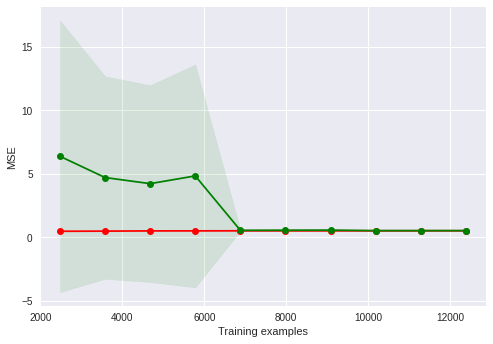

In [ ]:
from numpy.core.function_base import linspace
(train_sizes, train_scores, test_scores, fit_times, score_times) = learning_curve(lin_reg_pipeline,
                                                                                  train_features,
                                                                                  train_labels,
                                                                                  cv=shuffle_split_cv,
                                                                                  scoring='neg_mean_squared_error',
                                                                                  n_jobs=-1,
                                                                                  return_times=True,
                                                                                  train_sizes=np.linspace(0.2, 1, 10)
                                                                                  )
plot_learning_curve(train_sizes, train_scores, test_scores)

###Observe that
* Both learning curve reached a plateau, they are close and fairly high
* Model fits perfectly if training set has only few elements. But as more instances are added to training set, it becomes impossible for the model to fit the training data perfectly.
* When the model is trained on very few training instances, it is not able to generalize properly, which is why the validation error is initially quite high. Then as the model learns on more examples, the training and validation error reduces slowly.   

These learning curves are typical of an underfitting model.

In [ ]:
#plot_scalability_curve(train_size, fit_times)

##Model Examination
Let's examine the weight vectors and how much variability exists between them across different cross-validated models. 

For that first we have to generate a dataframe weight vectors and plot them with box plot.

In [ ]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

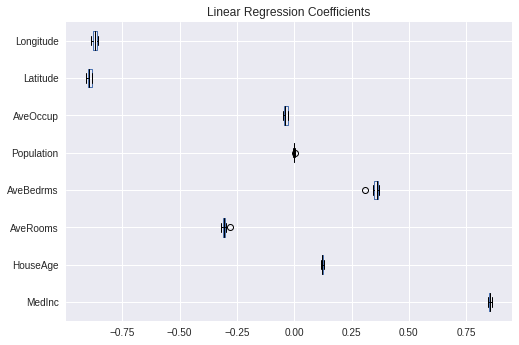

In [ ]:
coefs = [est[-1].coef_ for est in lin_reg_cv_result['estimator']]
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers': 'black', 'medians': 'black', 'caps': 'black'}
weights_df.plot.box(color=color, vert=False)
_ = plt.title('Linear Regression Coefficients')

There is not much variability in weights learned by different models.

It is understandable from the standard deviation of the weights as below

In [ ]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


##Selecting the best Model
Let's select the midel with lowest cross validated test error as the best performing model

In [ ]:
best_model_index = np.argmin(test_errors)
selected_model = lin_reg_cv_result['estimator'][best_model_index]

print('Intercept (w0): ', selected_model['lin_reg'].intercept_)
print('Coeffieients (w1, w2, ...wm): ', selected_model['lin_reg'].coef_)

Intercept (w0):  2.0779898917958657
Coeffieients (w1, w2, ...wm):  [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


##Model Performance
For this, let's obtain the predictions for test data in cross validation

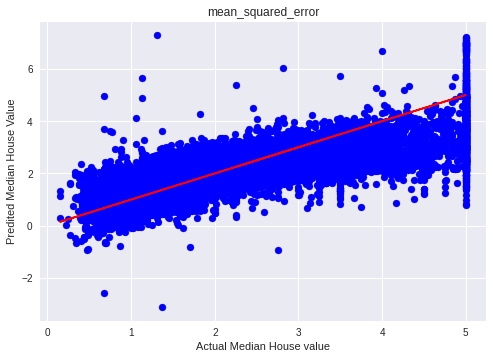

In [ ]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

mse_cv = mean_squared_error(train_labels, cv_predictions)
plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title('mean_squared_error')
plt.xlabel('Actual Median House value')
plt.ylabel('Predited Median House Value')
plt.show()

* The model seems to be all over the place in its predictions for example with label 5
* There are some negative predictions. We can fix this by adding a constraint on the weight to get positive predictions.

At this stage we should perform error analysis and check where the predictions are going wrong.   

We can revisit feature constructionpreprocessing or model stages and make the necessary corrections to get better performance.

#Srep5 : Predictions
We can use the best performing model from cross validation for getting predictions on the test set.

In [ ]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

We cal also obtain prediction using the initial model that we built without cross validation

In [ ]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

#Step 6: Report Model Performance
We report model perfoemance on the test set

In [ ]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)
print('R2 score for the best model obtained via cross validation: ', score_cv)
print('R2 score for the best model obtained without cross validation: ', score)

R2 score for the best model obtained via cross validation:  0.5923577635319088
R2 score for the best model obtained without cross validation:  0.5910509795491352


Alternatively we can use other metric of interest and report performance based on that. For rxample, the mean squared error as follows:

In [ ]:
mse = mean_squared_error(test_labels, test_predictions)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)

print('MSE for the best model obtained via cross validation: ', mse_cv)
print('MSE for the best model obtained without cross validation: ', mse)

MSE for the best model obtained via cross validation:  0.5393995876218523
MSE for the best model obtained without cross validation:  0.5411287478470688


The cross validated model has slightly better MSE than the other model and hence better performance.